# Fluctuations of the first row of diagram near the corner
First load usual modules and use usual sampling with dual RSK from Sage.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')

def sample (n, k):
    M = matrix ([[0 if random () <= 1/2 else 1 for j in range(1, k+1)] for i in range(1, n+1)])
    P, Q = RSK(M, insertion = RSK.rules.dualRSK)
    return list(P.shape())

We can sample a diagram and plot it as usual. For the simplest measure $\mu_{n,k}(\lambda)=2^{-nk}\mathrm{dim}V_n(\lambda) \mathrm{dim} V_k(\lambda')$ we need to take $n=k$.

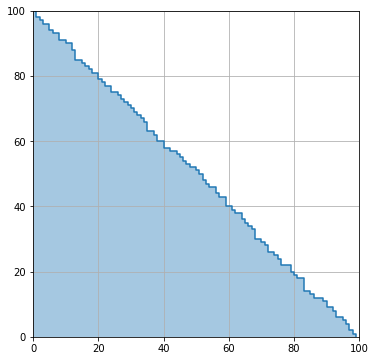

In [3]:
n=100
k=100

rows=sample(n,k)

# create a figure and axes
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   
ax1.set_xlim(( 0, k))            
ax1.set_ylim((0, n))

ax1.set_aspect('equal','box')
plt.grid()
diagdata=([x for x in rows for _ in range(2)]+[0],
[0]+[y for y in range(1,len(rows)+1) for _ in range(2)])
plt.plot(*diagdata)
plt.fill_between(*diagdata,alpha=0.4)
plt.show()       

We see a triangular shape. If we rotate $45^{\circ}$ we see a horizontal line.

But sampling a lot of diagrams takes time, because RSK implementation in Python is not fast it does not utilize multiple CPU cores. Nevertheless, we can see the shape of the distribution. We see a discrete distribution near the corner, as $\lambda_1\leq n$.

CPU times: user 39.7 s, sys: 71.3 ms, total: 39.8 s
Wall time: 39.9 s


(array([  3.,  42., 204., 251.]),
 array([ 97,  98,  99, 100, 101]),
 <BarContainer object of 4 artists>)

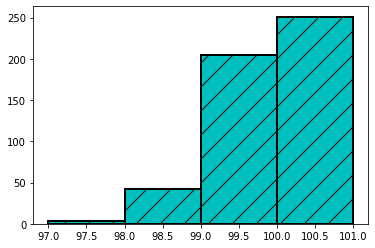

In [4]:
%%time
firstrowlengths=[sample(n,k)[0] for _ in range(500)]
binwidth=1
plt.hist(firstrowlengths,bins=np.arange(min(firstrowlengths), max(firstrowlengths) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

This lecture we use the same C code for RSK that we had last time, with the same adapter code in file `dual_rsk_sage.pyx`. It exports two functions, one `dual_rsk_with_weights` takes two lists `xs` and `ys` of Schur polynomial parameters and a seed for a random number generator and produces a diagram. Another one `dual_rsk` takes 0-1 matrix and produces a diagram. 

In [5]:
%runfile dual_rsk_sage.pyx

Compiling ./dual_rsk_sage.pyx...


In [6]:
%%time
import numpy as np
rng=np.random.default_rng()

n=200
k=300
a=2
b=3
xs=a*np.ones(n)
ys=b*np.ones(k)

diagram1=[len(x) for x in dual_rsk_with_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32'))[1] if len(x)>0]
print(diagram1)

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 299, 298, 298, 298, 298, 296, 296, 296, 295, 295, 295, 295, 294, 294, 294, 293, 293, 292, 292, 291, 291, 291, 291, 290, 289, 288, 288, 288, 286, 286, 286, 286, 285, 284, 284, 284, 283, 282, 282, 282, 281, 280, 279, 277, 277, 277, 276, 275, 274, 274, 272, 272, 270, 270, 269, 269, 267, 266, 265, 265, 265, 264, 263, 262, 261, 261, 261, 261, 258, 258, 257, 255, 254, 253, 252, 252, 250, 248, 248, 246, 245, 245, 243, 243, 242, 239, 239, 239, 238, 236, 235, 235, 235, 232, 232, 230, 229, 228, 226, 224, 221, 221, 220, 219, 218, 217, 216, 215, 214, 211, 210, 209, 205, 203, 202, 200, 198, 197, 194, 193, 191, 190, 189, 187, 185, 182, 181, 180, 177, 175, 170, 170, 168, 167, 164, 158, 156, 152, 150, 145, 144, 141, 139, 132, 124, 120]

In [7]:
%%time
ab=np.outer(xs,ys)
zeroonematrix=np.array(rng.uniform(size=ab.shape)>ab/(1+ab),dtype='int8')

diagram2=[len(x) for x in dual_rsk(zeroonematrix)[1] if len(x)>0]
print(diagram2)

[181, 175, 167, 163, 162, 157, 153, 150, 147, 145, 140, 140, 138, 136, 128, 128, 126, 123, 122, 120, 118, 116, 113, 110, 108, 108, 104, 103, 102, 100, 100, 97, 96, 94, 92, 91, 88, 88, 88, 85, 84, 83, 81, 80, 80, 78, 76, 76, 74, 73, 72, 72, 71, 69, 69, 68, 67, 65, 64, 64, 62, 60, 58, 57, 56, 56, 54, 52, 52, 52, 50, 48, 48, 47, 47, 46, 44, 41, 41, 40, 39, 39, 38, 38, 36, 35, 34, 34, 32, 31, 31, 30, 30, 29, 29, 27, 27, 27, 26, 25, 24, 24, 23, 22, 22, 21, 21, 19, 19, 19, 17, 16, 16, 16, 15, 14, 14, 14, 14, 13, 13, 12, 12, 12, 11, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 22.7 ms


We see that both functions are efficient. We use the code below to draw multiple diagrams at once.

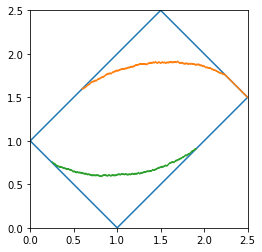

In [8]:
import matplotlib.pyplot as plt
def plot_multiple_diagrams(n,k,*diagrams):
    c=k/n
    plt.axes().set_aspect('equal','box')
    plt.ylim([0,c+1])
    plt.xlim([0,1+c])
    plt.plot([0,1,1+c,c,0],[1,0,c,1+c,1])
    for diagram in diagrams:
        plt.plot([(x+n-i-dx)/n for (i,x) in enumerate(diagram) for dx in (0,1)],
                 [(x+i+dx)/n for (i,x) in enumerate(diagram) for dx in (0,1)])


plot_multiple_diagrams(n,k,diagram1,diagram2)

To sample efficiently, we use `multiprocessing` module to create a pool of subprocesses that will be distributed among CPU cores. One way to sample many diagrams is to generate many random seeds at once and use `dual_rsk_with_weights` in multiprocessing setting.

Now let us take 1000 samples with $n=k=200$, we see basically the same distribution that does not depend on $n$.

CPU times: user 55.3 ms, sys: 64.5 ms, total: 120 ms
Wall time: 17.7 s


(array([  2.,  63., 419., 516.]),
 array([197, 198, 199, 200, 201]),
 <BarContainer object of 4 artists>)

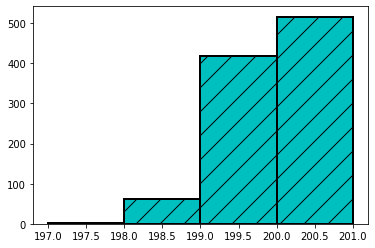

In [9]:
%%time
import subprocess

from multiprocessing import Pool
n=200
k=200
a=1
b=1
niter=1000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

Now consider the measure $\mu_{n,k}(\lambda|\alpha)=(1+\alpha)^{-nk} \alpha^{|\lambda|} \mathrm{dim}V_n(\lambda)\mathrm{dim}V_k(\lambda')$ and take $\alpha=c=k/n$. Then the diagram hits the corner horizontally and we get the same corner case.

CPU times: user 26.5 ms, sys: 239 µs, total: 26.7 ms
Wall time: 23.2 ms


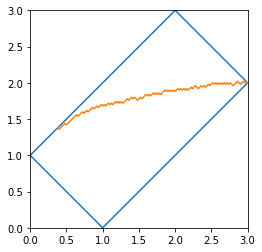

In [10]:
%%time
import numpy as np
rng=np.random.default_rng()

n=50
k=100
a=2
b=1
xs=a*np.ones(n)
ys=b*np.ones(k)

diagram1=[len(x) for x in dual_rsk_with_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32'))[1] if len(x)>0]
plot_multiple_diagrams(n,k,diagram1)

Sampling 2000 diagrams we see the same discrete distribution.

CPU times: user 53.3 ms, sys: 60.4 ms, total: 114 ms
Wall time: 1.89 s


(array([ 15., 188., 836., 961.]),
 array([ 97,  98,  99, 100, 101]),
 <BarContainer object of 4 artists>)

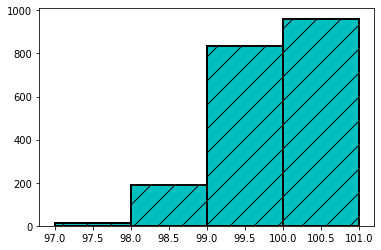

In [11]:
%%time
import subprocess

from multiprocessing import Pool
n=50
k=100
a=2
b=1
niter=2000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

Similarly, for the generic measure $\mu_{n,k}(\lambda|f,g)=\frac{s_{\lambda}(x_1,\dots,x_n)s_{\lambda'}(y_1,\dots,y_k)}{\prod_{i,j}(1+x_i y_j)}$ with $x_i=f(i/n)$ and $y_j=g(j/k)$ we have the corner case when $\int_0^1 f(s)\mathrm{ds}=c\int_0^1\frac{\mathrm{ds}}{g(s)}$. So taking $f(s)=\exp(s), g(s)=1$ we obtain the corner case for $c=e-1$.

CPU times: user 43.6 ms, sys: 135 µs, total: 43.8 ms
Wall time: 40 ms


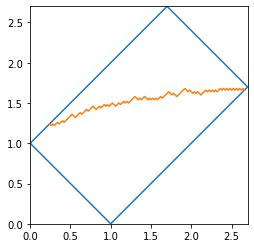

In [12]:
%%time
import numpy as np
rng=np.random.default_rng()

c=np.exp(1)-1
k=int(n*c)
a=1
b=1
xs=np.exp(np.arange(0,n)/n)
ys=b*np.ones(k)

diagram1=[len(x) for x in dual_rsk_with_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32'))[1] if len(x)>0]
plot_multiple_diagrams(n,k,diagram1)

Sampling 5000 diagrams we see the same discrete distribution as previously.

CPU times: user 57.2 ms, sys: 72.3 ms, total: 130 ms
Wall time: 3.19 s


(array([   3.,   32.,  442., 2137., 2386.]),
 array([81, 82, 83, 84, 85, 86]),
 <BarContainer object of 5 artists>)

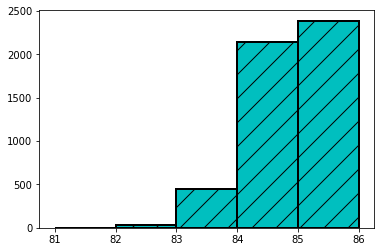

In [13]:
%%time
import subprocess

from multiprocessing import Pool
n=50
c=np.exp(1)-1
k=int(n*c)
a=1
b=1
niter=5000
xs=np.exp(np.arange(0,n)/n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

This discrete distribution was derived during the lecture

In [14]:
def kcrit(i,j,delta):
    return sum([1/(2*pi)*1/factorial(l)*sin(pi*(j-i)/2)*gamma(l+(j-i)/2) if l+(j-i)/2>0 else 
    1/2*(-1)^l/(factorial(l)*factorial((i-j)/2-l)) for l in range(0,floor((delta-j+1)/2))])

The probability $\mathbb{P}(\lambda_1-nc\leq -\Delta)=\det (\delta_{i,j}-K_{crit)(i,j))_{i,j=0}^{\Delta-1}$ is given by the determinant. Let's compute numerical values and compare to Table 1 in [Gravner, Tracy, Widom "Limit Theorems for Height Fluctuations in a Class of Discrete Space and Time Growth Models"](https://arxiv.org/pdf/math/0005133)

In [15]:
probs=[det(matrix(delta,lambda i,j:(1 if i==j else 0) - kcrit(i,j,delta))).n() for delta in range(9)]
probs

[1.00000000000000,
 0.500000000000000,
 0.0908450569081047,
 0.00563379268107850,
 0.000117616429425829,
 8.22907736376666e-7,
 1.92570222268262e-9,
 1.50564977152712e-12,
 3.90312782094782e-16]

Let's plot a barchart and compare it to our histograms. We see a good coincidence. 

(array([   3.,   32.,  442., 2137., 2386.]),
 array([81, 82, 83, 84, 85, 86]),
 <BarContainer object of 5 artists>)

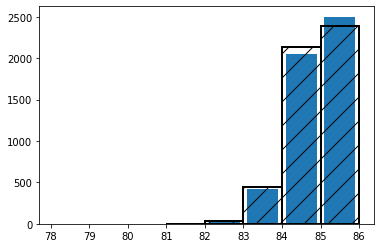

In [16]:
plt.bar(np.arange(k,k-len(probs)+1,-1)+1/2,niter*(np.array(probs[:-1])-np.array(probs[1:])))
data=np.array(rawstat2g)
binwidth=1
plt.hist(data,bins=np.arange(min(data), max(data) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=False)

## Discrete Hermite kernel
Consider $k=cn+s/\sigma \sqrt{n}$. Let us sample diagrams and look at the fluctuations of the first row for various values of $s$.

First, take $s/\sigma=1$, $n=100, c=1$, then $k=110$.

CPU times: user 40.7 ms, sys: 76.3 ms, total: 117 ms
Wall time: 1.98 s


(array([  6.,  47., 240., 448., 259.]),
 array([106, 107, 108, 109, 110, 111]),
 <BarContainer object of 5 artists>)

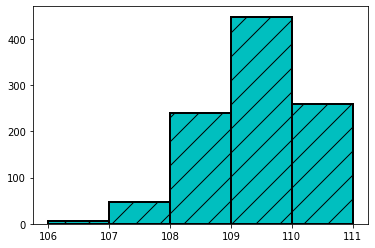

In [17]:
%%time
import subprocess

from multiprocessing import Pool
n=100
k=110
a=1
b=1
niter=1000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

We see a deformation of the critical discrete distribution of Gravner, Tracy and Widom. 

Now taking $n=200$ with the same $s,\sigma$ we see the same shape of the distribution.

CPU times: user 38.9 ms, sys: 92 ms, total: 131 ms
Wall time: 20.2 s


(array([  6.,  50., 247., 460., 237.]),
 array([210, 211, 212, 213, 214, 215]),
 <BarContainer object of 5 artists>)

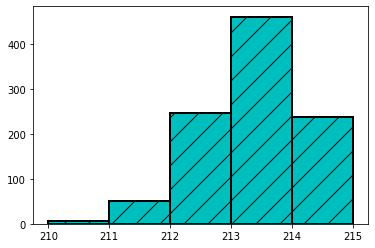

In [18]:
%%time
import subprocess

from multiprocessing import Pool
n=200
k=214
a=1
b=1
niter=1000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

Taking $s/\sigma=2$ we obtain different distribution.

CPU times: user 80.4 ms, sys: 48.4 ms, total: 129 ms
Wall time: 2.18 s


(array([  4.,  46., 190., 352., 316.,  92.]),
 array([115, 116, 117, 118, 119, 120, 121]),
 <BarContainer object of 6 artists>)

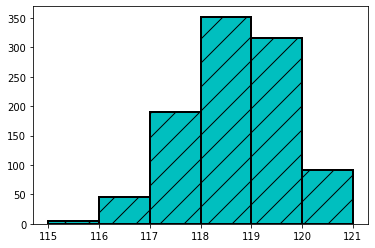

In [19]:
%%time
import subprocess

from multiprocessing import Pool
n=100
k=120
a=1
b=1
niter=1000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

For larger $s$ it starts to look like Tracy-Widom distribution. This lecture we have related this distribution to the discrete Hermite kernel of [Borodin and Olshanski "Asymptotics of Plancherel-type random partitions"](https://arxiv.org/pdf/math/0610240)

In [20]:
def sample_diagram_schur_weyl(n,k):
    seq=np.random.randint(1,n+1,size=k)
    P,Q=RSK(list(seq))
    return list(P.shape())#,P,Q

First sample diagrams for Schur-Weyl measure $\mu_{n,k}(\lambda)=n^{-k}\mathrm{dim}V_{GL_n}(\lambda)\mathrm{dim}V_{S_k}(\lambda)$ for $k=n^2$ and look at the distribution of the first column. We use implentation of RSK in Python from Sage, so it takes several minutes. 

**Exercise** 

Modify C code for dual RSK so that it works for ordinary RSK as well and use it here. 

In [21]:
%%time
n=128
k=16384
stat=[len(sample_diagram_schur_weyl(n,k)) for i in range(500)]
print(stat)

[128, 127, 126, 128, 128, 128, 127, 128, 127, 128, 128, 128, 128, 128, 127, 127, 128, 128, 128, 128, 127, 127, 126, 128, 128, 127, 127, 128, 126, 128, 128, 126, 128, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 127, 128, 127, 128, 128, 126, 126, 128, 126, 128, 127, 127, 128, 127, 128, 128, 127, 128, 127, 127, 127, 127, 128, 128, 128, 128, 127, 127, 127, 127, 128, 127, 128, 128, 127, 128, 127, 128, 127, 127, 128, 128, 127, 127, 128, 128, 127, 127, 127, 128, 128, 127, 126, 127, 127, 128, 127, 128, 127, 128, 127, 128, 128, 128, 127, 128, 128, 128, 128, 127, 128, 126, 128, 128, 128, 127, 127, 128, 128, 128, 128, 128, 128, 127, 128, 128, 127, 127, 128, 127, 127, 128, 128, 128, 126, 127, 127, 128, 127, 126, 128, 127, 128, 128, 126, 127, 127, 128, 127, 128, 128, 127, 127, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 126, 128, 127, 128, 127, 127, 128, 126, 128, 128, 128, 126, 127, 128, 127, 128, 128, 127, 128, 127, 127, 128, 128, 127, 127, 128, 128, 127, 128, 128, 128, 127, 128, 127,

(array([  3.,  44., 188., 265.]),
 array([125, 126, 127, 128, 129]),
 <BarContainer object of 4 artists>)

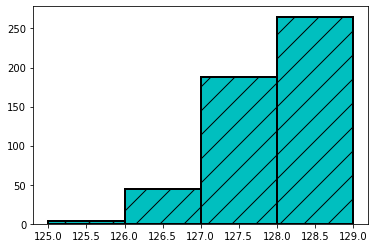

In [22]:
plt.hist(stat,bins=np.arange(min(stat), max(stat) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

We see the same distribution at the corner. Taking $k=n^2+s n^(3/2)$ we get to the discrete Hermite case, but if $s>0$ it is not very interesting, since first column is almost always of length $n$.

In [23]:
n=128
s=1
k=int(n^2+s*n^(3/2))
k

17832

CPU times: user 2min 36s, sys: 0 ns, total: 2min 36s
Wall time: 2min 36s


(array([  2.,  73., 425.]),
 array([126, 127, 128, 129]),
 <BarContainer object of 3 artists>)

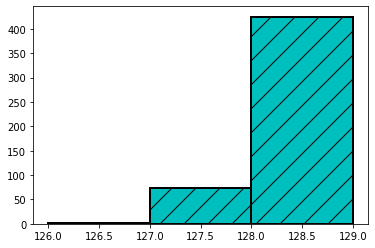

In [118]:
%%time
n=128
s=1
k=int(n^2+s*n^(3/2))
stat=[len(sample_diagram_schur_weyl(n,k)) for i in range(500)]
plt.hist(stat,bins=np.arange(min(stat), max(stat) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

CPU times: user 24.6 s, sys: 3.52 ms, total: 24.6 s
Wall time: 24.6 s


(array([  8., 492.]), array([63, 64, 65]), <BarContainer object of 2 artists>)

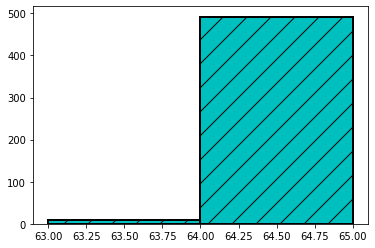

In [24]:
%%time
n=64
s=2
k=int(n^2+s*n^(3/2))
stat=[len(sample_diagram_schur_weyl(n,k)) for i in range(500)]
plt.hist(stat,bins=np.arange(min(stat), max(stat) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

It is more natural to take $s$ negative

CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s


(array([  2.,  57., 342., 968., 631.]),
 array([60, 61, 62, 63, 64, 65]),
 <BarContainer object of 5 artists>)

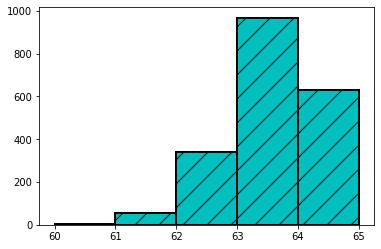

In [25]:
%%time
n=64
s=-1/2
k=int(n^2+s*n^(3/2))
niter=2000
stat=[len(sample_diagram_schur_weyl(n,k)) for i in range(niter)]
plt.hist(stat,bins=np.arange(min(stat), max(stat) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

Let's compare to the discrete Hermite kernel of Borodin and Olshanski. The function below implements the computation of the correlation kernel. We then use determinantal formula to compute the probabilities $\mathbb{P}(\lambda_1<n-\Delta)=\mathrm{det}(\delta_{i,j}-K^{H}_s(i,j))_{i,j=0}^{\Delta-1}$.

In [26]:
def kherm(i,j,s):
    var('t')
    if i==j:
        return 1/(sqrt(pi)*factorial(i)*2^i)*integral(exp(-t^2)*hermite(i,t)^2,t,s/sqrt(2),infinity)
    else:
        return 1/sqrt(4*pi*factorial(i)*factorial(j)*2^(i+j))*exp(-s^2/2)* \
        (hermite(i+1,s/sqrt(2))*hermite(j,s/sqrt(2))-hermite(i,s/sqrt(2))*hermite(j+1,s/sqrt(2)))/(i-j)

In the list `probs` we have probabilities computed by using Gravner-Tracy-Widom formula. These should coincide with Hermite kernel result for $s=0$. We see good numeric agreement.

In [27]:
probs

[1.00000000000000,
 0.500000000000000,
 0.0908450569081047,
 0.00563379268107850,
 0.000117616429425829,
 8.22907736376666e-7,
 1.92570222268262e-9,
 1.50564977152712e-12,
 3.90312782094782e-16]

In [28]:
probs2=[det(matrix(delta,lambda i,j:(1 if i==j else 0) - kherm(i,j,0))).n() for delta in range(9)]
probs2

[1.00000000000000,
 0.500000000000000,
 0.0908450569081047,
 0.00563379268107850,
 0.000117616429425829,
 8.22907736376666e-7,
 1.92570222268262e-9,
 1.50564630208017e-12,
 3.93782229046735e-16]

Now let us compute for $s=1/2$ and compare to the histograms above.

In [29]:
s=1/2
probs3=[det(matrix(delta,lambda i,j:(1 if i==j else 0) - kherm(i,j,s))).n() for delta in range(7)]
probs3

[1.00000000000000,
 0.691462461274013,
 0.232450362354622,
 0.0874861212909950,
 0.0248932533758471,
 0.00752632729586093,
 0.00193311765090678]

Let us sample first row of the diagram from the distribution $\mu_{n,k}=\mathrm{dim}V_{GL_n}(\lambda)\mathrm{dim}V_{GL_k}(\lambda)2^{-nk}$ for $k=n+s\sqrt{n}$ for $s=1/2$.

CPU times: user 62.6 ms, sys: 72.1 ms, total: 135 ms
Wall time: 3.41 s


(array([  1.,  33., 308., 912., 746.]),
 array([101, 102, 103, 104, 105, 106]),
 <BarContainer object of 5 artists>)

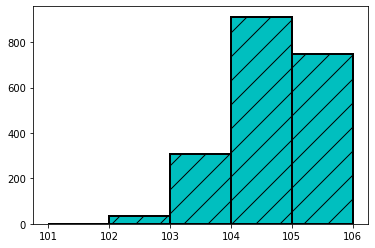

In [31]:
%%time
import subprocess

from multiprocessing import Pool
n=100
k=105
a=1
b=1
niter=2000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

Now the list `probs3` contains cumulative probabilities, to plot the histogram we need to get list of differences. The list `stat` contains the result of sampling of the first columnt for the Schur-Weyl measure. The list `rawstat2g` contains the results of sampling of $GL_n\times GL_k$ measure for $k=n+s\sqrt{n}$.

(array([  1.,  33., 308., 912., 746.]),
 array([60, 61, 62, 63, 64, 65]),
 <BarContainer object of 5 artists>)

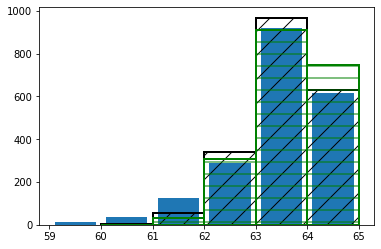

In [33]:
n=64
plt.bar(np.arange(n,n-len(probs3)+1,-1)+1/2,niter*(np.array(probs3[:-1])-np.array(probs3[1:])))
data=np.array(stat)
data2=np.array(rawstat2g)-max(rawstat2g)+n
binwidth=1
plt.hist(data,bins=np.arange(min(data), max(data) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=False)
plt.hist(data2,bins=np.arange(min(data2), max(data2) + 2*binwidth, binwidth),hatch='-',edgecolor='g',linewidth=2, facecolor='c',fill=False)

On the plot we see a reasonable coincidence of the histograms for $s=1/2$ for the discrete Hermite kernel (blue), Schur-Weyl measure (black) and skew $GL_n\times GL_k$ measure (green).